# Darren Hunt

PHYS 434AA

10-18-2020

Lab 2

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

Assume in 1 day the average cosmic-ray background is some number X; and the average number of gamma-rays emitted by your hypothetical source is Y (something larger than X).

In [2]:
Xbkg = [2]  # avg cosmic ray bkg from 1 day
Ysource = 10  # avg gamma ray from source

In [3]:
def convolve(d, N, X):
    # a function to quickly convolve a distribution N times for a given distribution.
    
    # make a distribution based on user input
    if d == "Gaussian":
        distr = stats.norm.pdf(xi,0)
    elif d == "Rayleigh":
        xi = np.linspace(0,10,1000)
        distr = stats.rayleigh.pdf(xi,0)
    elif d == "Poisson":
        xi = np.linspace(0,9,10)  # initial x vals
        distr = stats.poisson.pmf(xi,X)
    
    avg = distr
    out = []
    for i in range(N):
        avg = np.convolve(avg,distr)
        out.append(avg)
    return out

In [4]:
def plotter(d, y, N, op):
    # a function to quickly plot graphs for this lab; also plots a semilog plot for comparison.
    # plots different styles based on distribution type. "op" indicates plotting a sum or an average.
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,7),gridspec_kw={'wspace': 0.3})
    ax1.tick_params(labelsize=16), ax2.tick_params(labelsize=16)
    if d != "Gaussian":
        ax1.set_title(d + " Distribution for " + str(N) + " Convolutions", fontsize=24 )
    else:
        ax1.set_title("Gaussian of Background", fontsize=24 )

    ax2.set_title("Semilog Plot for " + d + " Distribution", fontsize=24)
    
    if d == "Rayleigh":
        ax1.set_xlabel("x", fontsize=16)
        ax2.set_xlabel("x", fontsize=16)
        ax1.set_ylabel("F(x)", fontsize=16)
        ax2.set_ylabel("Log[F(x)]", fontsize=16)
        for i in range(N): # for overplotting onto same graph
            if N <=5:
                ax1.plot(np.linspace(0,10,len(y[i])),y[i],label=str(i+1)+" Convolutions"), ax2.semilogy(np.linspace(0,10,len(y[i])),y[i])
                ax2.set_ylim(1e-22, 10e5)
            else:
                ax1.plot(np.linspace(0,10,len(y[N-1])),y[N-1],label=str(N)+" Convolutions" if i==N-1 else""), ax2.semilogy(np.linspace(0,10,len(y[N-1])),y[N-1])
                ax2.set_ylim(1e-22)
    
    elif d == "Gaussian":
        ax1.set_xlabel("Signal counts", fontsize=16), ax2.set_xlabel("Signal counts", fontsize=16)
        ax1.set_ylabel("Probability", fontsize=16), ax2.set_ylabel("Log[Probability]", fontsize=16)
        ax1.plot(np.linspace(-25,25,1000),y,label='1 Pix'), ax2.semilogy(np.linspace(-25,25,1000),y),# ax2.semilogy(np.linspace,-50,50,1000,y*10000)
        ax1.set_xlim(0,25), ax2.set_xlim(0,25)    
            
    elif d == "Poisson":
        ax1.set_xlabel("Average Cosmic Ray Count", fontsize=16), ax2.set_xlabel("Average Cosmic Ray Count", fontsize=16)
        ax1.set_ylabel("Probability", fontsize=16), ax2.set_ylabel("Log(Probability)", fontsize=16)
        for i in range(N):
            if op=="sum" and N<=4:
                ax1.step(np.linspace(0,len(y[i]),len(y[i])),y[i],label=str(i+1)+" Convolutions"), ax2.semilogy(np.linspace(0,len(y[i]),len(y[i])),y[i])
                ax1.set_xlim(0,25)
            elif op=="sum" and N>4:
                ax1.step(np.linspace(0,len(y[N-1]),len(y[N-1])),y[N-1],label=str(N)+" Convolutions" if i==N-1 else"")
                ax2.semilogy(np.linspace(0,len(y[N-1]),len(y[N-1])),y[N-1])
                ax1.set_xlim(0,25)
            elif op=="avg" and N<=4:
                ax1.step(np.linspace(0,9,len(y[i])),y[i],label=str(i+1)+" Convolutions"), ax2.semilogy(np.linspace(0,9,len(y[i])),y[i])
                ax1.set_xlim(0,10), ax2.set_ylim(1e-7)
            else:  # avg
                ax1.step(np.linspace(0,9,len(y[N-1])),y[N-1],label=str(N)+" Convolutions" if i==N-1 else""), ax2.semilogy(np.linspace(0,9,len(y[N-1])),y[N-1])
                ax1.set_xlim(0,9)
                
    ax1.legend(loc='best',fontsize=10)   
    plt.show()

In [5]:
p3 = convolve("Poisson",3,Xbkg)  # convolve a Poisson distribution with mean=2, 3 times.

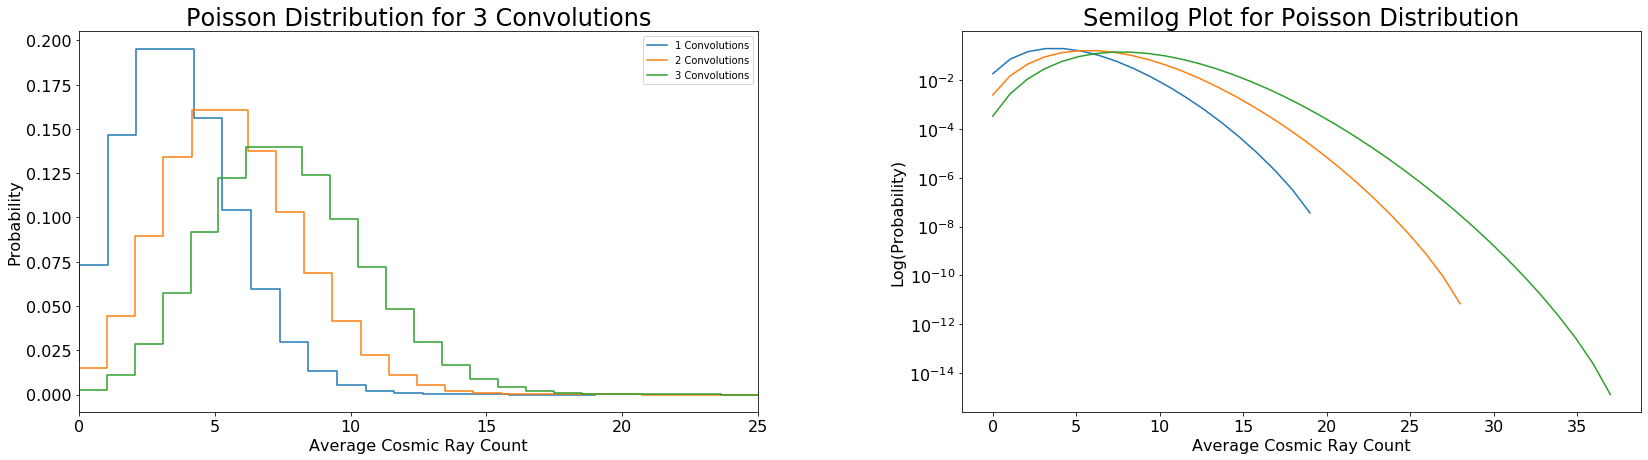

In [6]:
plotter("Poisson",p3,3,"sum")

Above, I wrote two functions: one to convolve a specified distribution *N* number of times, and another to plot either a discrete or continuous graph based on those results.

Given in the problem setup, the average cosmic ray background noise follows a discrete probablity mass function, the Poisson distribution. I have arbitrarily selected X = 2 for a mean count of cosmic ray noise per day. Then, using my convolve function, I summed this Poisson background for 3 days using the convolution operator 3 times. The graphs above show the resultant distribution for the first, second, and third convolution.

We can see that the average cosmic ray count will shift up on the x-axis, meaning as we sum over multiple (here 3) days, we will find more cosmic ray counts over that time period. This operation simply sums up the total average cosmic ray counts over a specified number of days, if on day 1 we know there is an average of 2 counts. The probabilities decrease as we sum up for more days, and the width of the distribution is slightly wider each following day. This indicates we are less likely to measure a larger cosmic ray count over more days, and that there are more possible average values to measure as well.

As we sum for more days, the distribution retains a Poisson shape. This is evident especially in the semilog plot comparison, where the logs of the Poisson plots do not approach a parabolic shape (which would indicate a Gaussian shape).

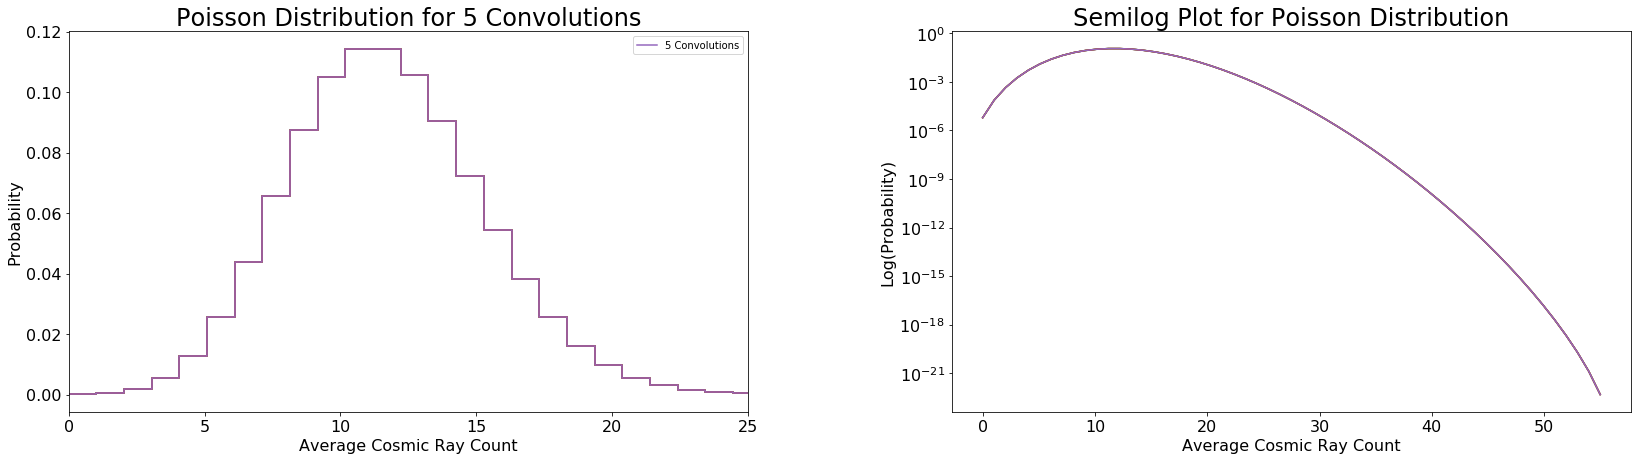

In [7]:
p5 = convolve("Poisson",5,Xbkg)
plotter("Poisson",p5,5,"sum")

These graphs plot the same Poisson distribution with a mean of X = 2 summed 5 times now, and the corresponding semilog plot. This means we have summed the average cosmic ray counts for 5 separate days, using the average from cosmic ray counts per day. The left graph shows that after 5 summations, the distribution still retains the discrete Poisson shape, and that the probability to measure the average cosmic ray count for 5 days decreased. The semilog plot demonstrates that the distribution has not approached a Gaussian shape, similar to the previous problem. We expect a parabolic shape if it had approached a Gaussian distribution.

Conceptually, this makes sense. Here we are only looking at expected cosmic ray counts each day, so we shouldn't expected the distribution of the background noise to approach a continuous distribution unless we calculate how the mean changes in a 1-day period by an averaging convolution operation.

Mathematically, this outcome is expected as well. Summing the average counts from one day over a 5-day observation period, is identical to summing 5 days' average counts for a single period. This operation just adds the expected values over time. We aren't dividing (such as in an averaging operation) so there is no scaling process happening, which would alter the shape in that process.

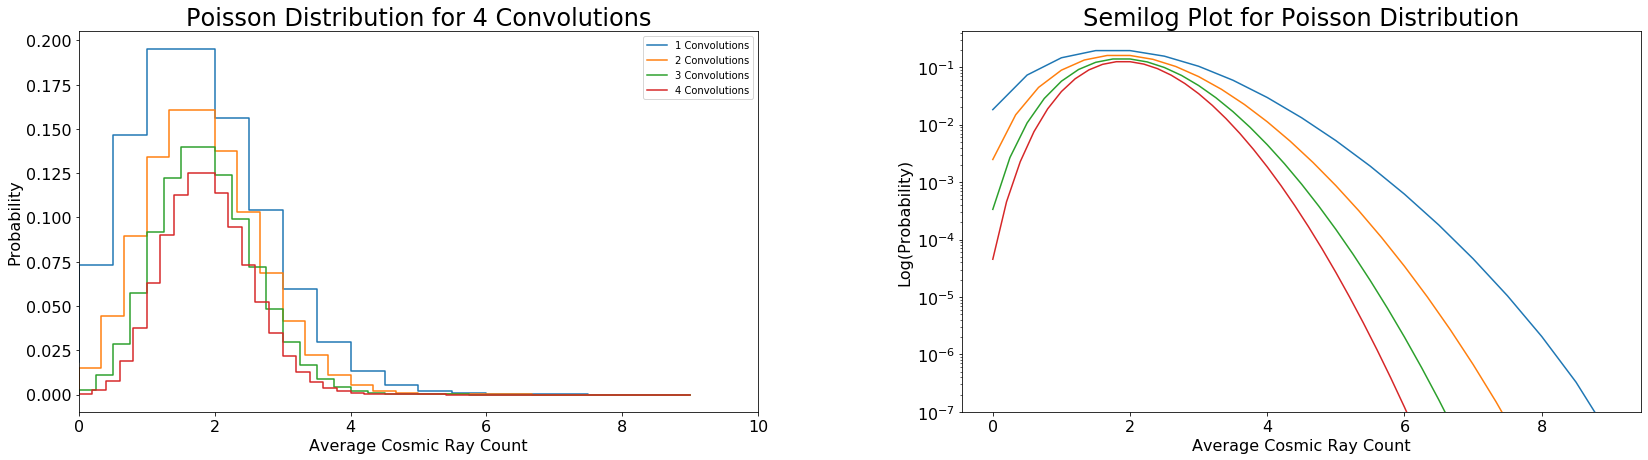

In [8]:
p4 = convolve("Poisson",4,Xbkg)
plotter("Poisson",p4,4,"avg")

These graphs show how a Poisson distribution changes when we use convolution for averaging. To do this, we use the convolution operator again to sum, then divide to keep the mean constant at X, which we initially chose to be X = 2 mean cosmic ray counts. For simplicity, I had my convolution function use x values from 0 to 9 (10 total), so to simulate averaging, my plotter function similarly restricts the x-axis to (0,9) and hold the mean constant. The x values corresponding to the probabilities calculated using the convolution function are also restricted to this range.

When averaging the days, the Poisson probability mass function holds a constant mean, loses spread/width, and takes on a shorter peak as we average more times. In other words, the distribution is squeezed along the x-axis and held at a constant pre-defined x-value. This means that as we average the expected cosmic ray count many times, other possible cosmic ray counts lessens (hence the lesser spread) and at the same time the peak of the expected decreases (to keep the area under the distribution equal to 1). In terms of observational data, this tells us there is less variance in possibilities, and the expected value remains the most probable outcome.

Compared to performing a summation and not an average, the spread of the distributions are different, and the expected value stays constant when averaging. Looking at the semilog plot, we can see that after 4 convolutions, the Poisson distribution begins to approach a parabolic shape according to the Central Limit Theorem. When averaged using convolution enough times, the semilog plot will display a parabolic or near-parabolic shape according to this theorem, meaning it has converged to a normal or Gaussian distribution. The shape of the background Poisson, when averaged 4 times, is near-parabolic.

In [9]:
days = 8
avg8 = convolve("Poisson",days,Ysource)

cdf = 0
for i in range(days-1):
    cdf = sum(avg8[i])

sigma_8days = stats.norm.ppf(1-cdf)
print("Sigma = " + str("{0:.2f}".format(sigma_8days)))

Sigma = 2.89


If our source provides Y * N gamma rays over *N* averaged days, and on average in one day the source provides Y = 10 gamma rays, then we should observe 10 * 8 = 80 gamma rays over an eight day period (according to the parameters chosen above).

In order to calculate the sigma value for this observation, I convolved a Poisson distribution with a mean of Y = 10, 8 times. Our previous convolutions all used a background mean of X = 2, so this operation had to be performed again with the mean specific to the signal. Then, I summed up the probabilities over the 8 day average. Finally, this was converted to the corresponding sigma value using the inverse percent point function for a normal distribution, yielding a sigma of 2.89 for this observation.

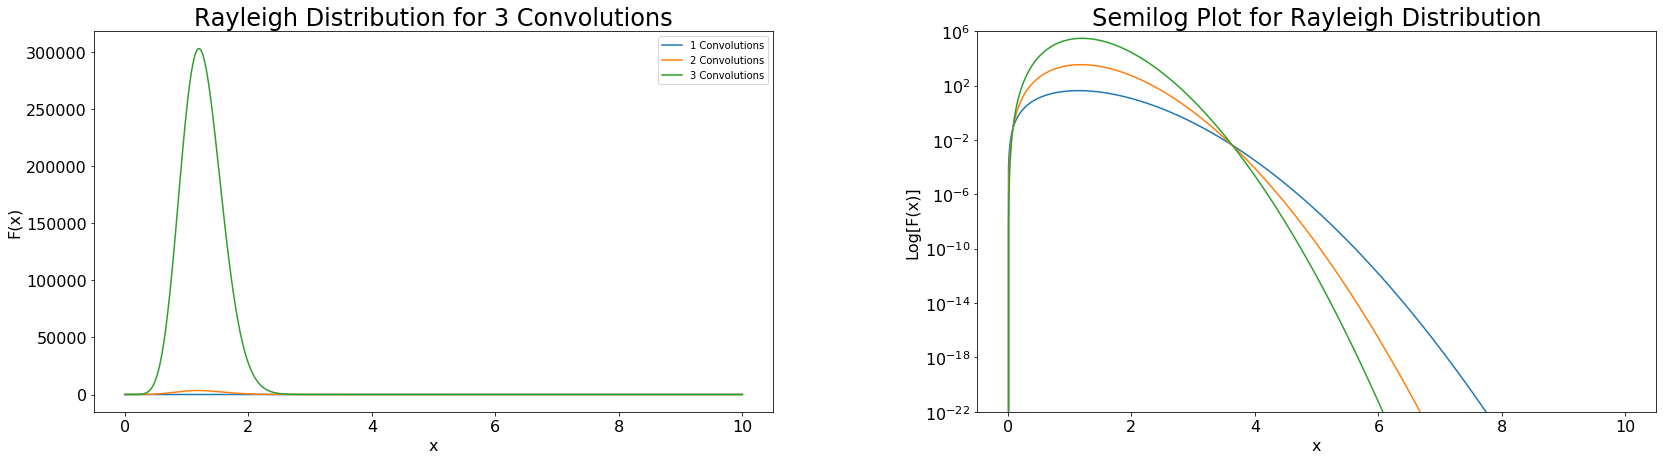

In [10]:
# Rayleigh plotting
r3 = convolve("Rayleigh",3,Xbkg)
plotter("Rayleigh",r3,3,"avg")

The above graph plots the Rayleigh distribution, a skewed continuous distribution, that has been convolved 3 times, as well as a corresponding semilog plot. As we average the background, using the same X parameter as previously, we see that the peak of the distribution very quickly spikes, and the width is altered as well. The semilog shows that more as we convolve the Rayleigh curve, it begins to approach a somewhat parabolic shape, according to the Central Limit Theorem. However, the rate at which it converges is different than that of a Poisson.

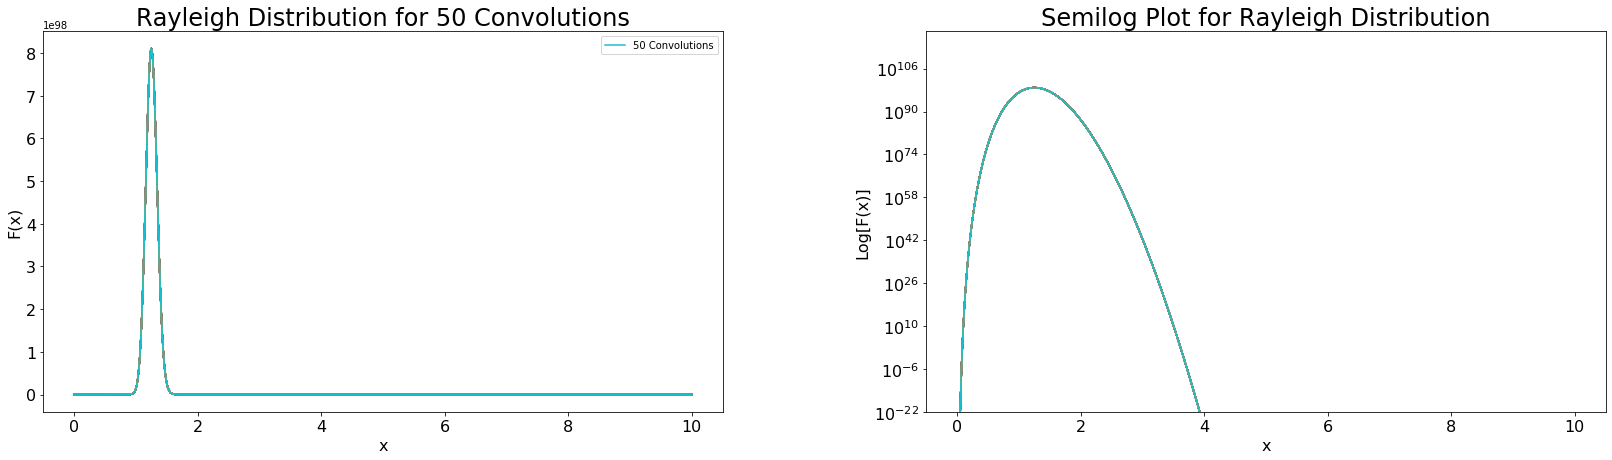

In [11]:
r50 = convolve("Rayleigh",50,Xbkg)
plotter("Rayleigh",r50,50,"avg")

Here, after convolving 50 times, we see on the semi-log plot that the shape is very near-parabolic as expected. Though it has taken more convolutions, it still converges to the expected normal distribution once averaged enough times. The variance/width of the distribution is very small, compared to the narrow, tall spike that the distribution takes. When scaled appropriately for a given dataset it would yield probability.

For a zero-mean Gaussian-distributed background with a width of X = 4, what is the probability that the background produces noise that is as signal-like or more than from a source with signal strength of Y = 23.5, in a single pixel?

In [12]:
X = 4  # background
Y = 23.5  # source strength

pbkg = 1 - stats.norm.cdf(Y,scale=X)
sig = np.abs(stats.norm.ppf(pbkg))
print("Probability = " + str(pbkg))
print("Sigma = " + str("{0:.2f}".format(sig)))

Probability = 2.1142166906074067e-09
Sigma = 5.88


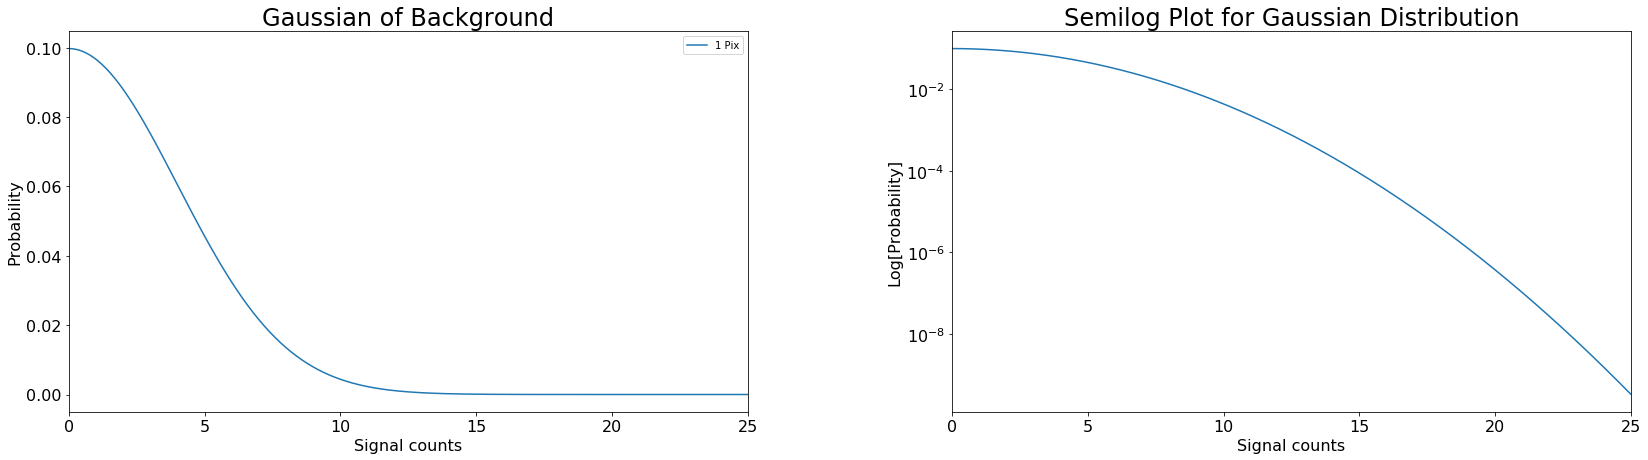

In [13]:
xval = np.linspace(-25,25,1000)
g = stats.norm.pdf(xval,scale=X)
plotter("Gaussian",g,0,"avg")

If we only look in this single pixel on the CCD, using the information we know about the background (zero mean Gaussian distribution, width = 4) and what we know about the source (signal strength = 23.5) then a probability calculation using the cumulative distribution function yields a probability on the order of magnitude of 2e-9. We subtract this from 1 to fix the integration bounds to be at or above, instead of below or at, according to how the CDF integrates in Python. This is a very small number, so converting to a sigma value using the inverse function, yields 5.88. Interpreting in terms of the problem, this means that the probability the signal we measured is statistically significant, since it is above 5-sigma. There is little chance the background generated this signal randomly. Therefore, we can call this observation a discovery.

For a zero-mean Gaussian-distributed background with a width of X = 4, what is the probability that the background produces noise that is as signal-like or more than from a source with signal strength of Y = 23.5, in at least 1 pixel within a given CCD area of 10,000 pixels?

In [14]:
# multiply the previous results for 1 pixel, by 10,000 pixels
p10k = pbkg * 10000
sig10k = np.abs(stats.norm.ppf(p10k))

print("Probability = " + str(p10k))
print("Sigma = " + str("{0:.2f}".format(sig10k)))

Probability = 2.1142166906074067e-05
Sigma = 4.09


Using the previously calculated probability for a single pixel randomly generating a background noise that is as or more signal like than the detection we stated (Y = 23.5), we multiply this value by the number of pixels to search through, 10,000. This means we are calculating the probability that at least 1 pixel, within an area of 10,000 pixels, has the signal that we detected. The resultant probability is now larger, but the sigma is smaller. This means that our calculation is less significant. Since it is below a sigma of 5, it is not statistically significant enough, and we cannot be confident that the background did not generate this signal as random noise. This conceptually makes sense in terms of the problem. If we are hoping to see a very rare scientific discovery, the probability that we find it in multiple other pixels/areas on the CCD should be very low--otherwise, our observation is seemingly very "common" and it is difficult to prove the background did not provide that signal.

In [15]:
gdistr = stats.norm(scale=X)  # a Gaussian with a width of 4
prob5sig = 1 - stats.norm.cdf(5)  # probability for a sigma of 5
signal5 = gdistr.ppf(1 - prob5sig)  # corresponding signal

print("Sigma = 5; Probability = " + str(prob5sig))
print("Signal = " + str("{0:.2f}".format(signal5)))

Sigma = 5; Probability = 2.866515719235352e-07
Signal = 20.00


Going backwards, if we start knowing that we want a sigma value of 5 for statistical significance, and use the same Gaussian distribution with a width of X = 4 as before, we can invert the calculations and yield a necessary signal of 20 counts. This means that if a pixel has a signal strength at or above 20.0, the significance is at or greater than 5 sigma.

In [16]:
pnew = prob5sig / 10000
signew = gdistr.ppf(1 - pnew)

print("Sigma = 5; Probability = " + str(pnew))
print("Signal = " + str("{0:.2f}".format(signew)))

Sigma = 5; Probability = 2.866515719235352e-11
Signal = 26.20


This follows the same formula for determining sigma values, though here we have included a factor of 10,000 to account for 10,000 pixels as opposed to a single pixel. The probability to achieve a 5-sigma significance in an observation is much lower; this means that in order for an observation to be considered a discovery or statistically significant in a larger observational field, we need a lower chance of it occuring (i.e. "one in a million" event) as well as a higher signal strength (brighter) for it to be considered true.

In [17]:
ratio = signew / signal5
print(ratio)

1.3101074973861455


For a trials factor of 10k, where we search for a rare event in 10,000 pixels/places as opposed to one, the brightness of the signal must now be increased by 1.3x the original signal strength for a single pixel. Since we are looking at a larger scale area, this threshold increases due to the increasing probability that the Gaussian background noise randomly contributes a noise that is as signal-like or more than what we are looking for. Therefore, when conducting a trials factor, the probability must decrease, the sigma must remain at or above 5, and the necessary signal subsequently must increase in order for an event to be considered statistically significant.

In [18]:
trial1mil = gdistr.ppf(1 - prob5sig / 1000000)
trial1bil = gdistr.ppf(1 - prob5sig / (10 ** 9))

print("Signal required, 1 million trials = " + str("{0:.2f}".format(trial1mil)) + ", Trials Factor = " + str("{0:.2f}".format(trial1mil/signal5)))
print("Signal required, 1 billion trials = " + str("{0:.2f}".format(trial1bil)) + ", Trials Factor = " + str("{0:.2f}".format(trial1bil/signal5)))

Signal required, 1 million trials = 28.83, Trials Factor = 1.44
Signal required, 1 billion trials = 32.31, Trials Factor = 1.62


By increasing the trials, in this case pixels we are searching for a rare event, the subsequent brightness required for a statistically significant measurement continues to increase. For 1 million pixels, we need a signal strength of 1.44x brighter than the signal strength for a single pixel. For 1 billion pixels, this must be 1.62x brighter. This isn't drastically different from the original sensitivity required, though it is larger. This may be due to contribution of the background. Additionally, if we increase our sample size by large orders of magnitude, by looking elsewhere we have a higher likelihood of finding *some* signal that is significant.

In [19]:
rayl = stats.rayleigh(scale=X)
pray = 1 - stats.norm.cdf(5)  # probability for a sigma of 5
sigray = rayl.ppf(1 - pray)  # corresponding signal

print("Sigma = 5; Probability = " + str(pray))
print("Signal, 1 pixel = " + str("{0:.2f}".format(sigray)))

ray10k = rayl.ppf(1 - pray / 10000)
ray1mil = rayl.ppf(1 - pray / 1000000)
ray1bil = rayl.ppf(1 - pray / (10 ** 9))

print("Signal required, 10k trials = " + str("{0:.2f}".format(ray10k)) + ", Trials Factor = " + str("{0:.2f}".format(ray10k/sigray)))
print("Signal required, 1 million trials = " + str("{0:.2f}".format(ray1mil)) + ", Trials Factor = " + str("{0:.2f}".format(ray1mil/sigray)))
print("Signal required, 1 billion trials = " + str("{0:.2f}".format(ray1bil)) + ", Trials Factor = " + str("{0:.2f}".format(ray1bil/sigray)))

Sigma = 5; Probability = 2.866515719235352e-07
Signal, 1 pixel = 21.96
Signal required, 10k trials = 27.87, Trials Factor = 1.27
Signal required, 1 million trials = 30.40, Trials Factor = 1.38
Signal required, 1 billion trials = 33.77, Trials Factor = 1.54


If our background was shaped differently than a Gaussian, the sensitivity penalty of the trials factor is slightly altered, but not majorly. The thresholds are still on the same order of magnitude; i.e. the brightnesses required for a statistically significant observation in a large field are about the same as those for a Gaussian. This is because once averaged enough times, most distributions including the Rayleigh and others, will approach Gaussian behavior according to the Central Limit Theorem. Therefore, when the Rayleigh (or another) distribution is averaged enough times in a trials factor, it will behave very closely to that of a Gaussian background as we did in this problem.